In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

import imageio

from skimage.transform import  resize

import keras
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.features.importances import FeatureImportances

Using TensorFlow backend.


In [2]:
hist = pd.read_csv('../input/train_labels.csv')

In [3]:
hist.head() 

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [4]:
hist.shape

(220025, 2)

In [5]:
hist.label.value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [6]:
import os

In [7]:
len(os.listdir('../input/train'))

220025

In [8]:
len(os.listdir('../input/test'))

57458

In [9]:
img = imageio.imread('../input/train/00140068628e6c486d9fc9397f4c9a151590b9ff.tif')

In [10]:
img.shape

(96, 96, 3)

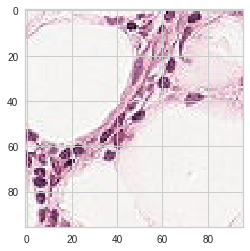

In [11]:
plt.imshow(img)
plt.show()

In [12]:
img_name = []
for i in hist.id:
    img_name.append(i + '.tif')

In [13]:
img_name_1 = img_name[0: 63500]
img_label = hist.label[0: 63500]

In [14]:
image_arrays = pd.Series(img_name_1).apply(lambda x: imageio.imread('../input/train/' + x))

In [15]:
image_list = []
for i in range(0, len(np.asarray(image_arrays))):
    image_list.append(resize(np.asarray(image_arrays)[i], (48, 48)))

In [16]:
image_list[0].shape

(48, 48, 3)

In [17]:
print('the shape of original image is:', image_arrays[1].shape)
print('after resizing shape of image is:', image_list[1].shape)

the shape of original image is: (96, 96, 3)
after resizing shape of image is: (48, 48, 3)


In [18]:
print('the size of original image is:', image_arrays[1].size)
print('after resizing size of image is:', image_list[1].size)

the size of original image is: 27648
after resizing size of image is: 6912


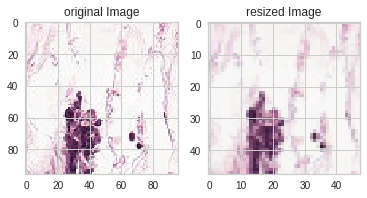

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(image_arrays[1])
plt.title('original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_list[1])
plt.title('resized Image')
plt.show()

In [20]:
np.array(image_list).shape

(63500, 48, 48, 3)

In [21]:
X = np.array(image_list)
#y = np_utils.to_categorical(img_label, 2)
y = img_label

In [22]:
X_train, X_val, y_train, y_val = tts(X, y, test_size = .25, random_state = 1)

In [23]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(47625, 48, 48, 3) (15875, 48, 48, 3) (47625,) (15875,)


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [25]:
model = Sequential()
model.add(Conv2D(100, (3, 3), input_shape = (48, 48, 3), activation = 'relu', padding = 'Same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'softmax'))

In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 100)       2800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [28]:
# batch_size = 20
# model.fit(X_train, y_train, batch_size = batch_size, epochs = 10, verbose = 1, validation_data = (X_val, y_val))

In [29]:
# Train on 47625 samples, validate on 15875 samples
# Epoch 1/10
# 47625/47625 [==============================] - 55s 1ms/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 2/10
# 47625/47625 [==============================] - 47s 996us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 3/10
# 47625/47625 [==============================] - 47s 996us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 4/10
# 47625/47625 [==============================] - 47s 995us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 5/10
# 47625/47625 [==============================] - 47s 994us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 6/10
# 47625/47625 [==============================] - 47s 996us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 7/10
# 47625/47625 [==============================] - 47s 995us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 8/10
# 47625/47625 [==============================] - 48s 999us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 9/10
# 47625/47625 [==============================] - 47s 993us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# Epoch 10/10
# 47625/47625 [==============================] - 47s 994us/step - loss: 9.4697 - acc: 0.4060 - val_loss: 9.5474 - val_acc: 0.4011
# <keras.callbacks.History at 0x7f54cb731ef0>